In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

data = pd.read_csv('/content/avila-tr.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
data=data.replace('NaN',0)

In [6]:
data=data.replace('nan',0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10430 non-null  float64
 1   1       10430 non-null  float64
 2   2       10430 non-null  float64
 3   3       10430 non-null  float64
 4   4       10430 non-null  float64
 5   5       10430 non-null  float64
 6   6       10430 non-null  float64
 7   7       10430 non-null  float64
 8   8       10430 non-null  float64
 9   9       10430 non-null  float64
 10  10      10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [10]:
x=data.iloc[0:,:10]
y=data.iloc[0:,-1]
x.head()
type(y)
len(y)

10430

In [11]:
y.head

<bound method NDFrame.head of 0        A
1        A
2        A
3        A
4        F
        ..
10425    F
10426    F
10427    A
10428    E
10429    X
Name: 10, Length: 10430, dtype: object>

In [14]:
data.shape

(10430, 11)

In [13]:
encoder = {'A':1 ,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}

for i in range(data.shape[0]):
    y[i]=encoder[y[i]]
y=y.astype(int)

In [15]:
def accuracy(X_train,y_train,X_test,y_test,params):
    print(params)
    co = SVC(kernel=params[0],C=params[1],gamma=params[2],degree=params[3])    
    co.fit(X_train,y_train)
    y_pred = co.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [16]:
kernalList=[ 'linear','poly', 'rbf', 'sigmoid']
bestAccuracy = -9999
cvgs_data = []
samples_collection = []

In [17]:
def sample(X,Y,iter=100):
    global bestAccuracy
    saccuracy = 0
    sgamma = 0     #  rbf,poly sig only
    skernel = ''
    sc =  0       
    sdegree = 0         # poly only
    scvgsdata = []
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for _ in range(iter):
        kernel = r.choice(kernalList)
        c = r.randint(1,6)
        g = r.randint(-1,6)
        p = r.randint(1,7)
        if(g<1):
            g=r.choice(['scale','auto'])
        if(kernel == 'poly'):
            g=r.choice(['scale','auto'])
        
        acc = accuracy(X_train,y_train,X_test,y_test,[kernel,c,g,p])    

        print(acc)

        if(acc>saccuracy):
            saccuracy=acc
            sc=c
            sdegree=p
            skernel=kernel
            sgamma=g
        
        scvgsdata.append(saccuracy)

    samples_collection.append([skernel,sc,sgamma,sdegree,saccuracy])

    if(saccuracy>bestAccuracy):
            global cvgs_data
            cvgs_data = scvgsdata
            bestAccuracy=saccuracy


for _ in range(10):
    sample(x,y,20)

['rbf', 5, 'auto', 1]
0.7222754873761585
['sigmoid', 5, 6, 6]
0.3221476510067114
['linear', 6, 6, 4]
0.5643975711089805
['linear', 1, 2, 3]
0.5669542984979227
['linear', 3, 5, 3]
0.5647171620325983
['sigmoid', 4, 'auto', 7]
0.39661233620965164
['rbf', 4, 6, 6]
0.6350271652285076
['rbf', 1, 'scale', 7]
0.6666666666666666
['rbf', 2, 4, 4]
0.6762543943751997
['linear', 6, 3, 2]
0.5643975711089805
['sigmoid', 2, 6, 4]
0.3247043783956536
['linear', 4, 5, 3]
0.5656759348034516
['rbf', 3, 4, 5]
0.6775327580696708
['rbf', 3, 5, 5]
0.658037711728987
['linear', 6, 6, 5]
0.5643975711089805
['linear', 5, 'auto', 6]
0.5653563438798338
['sigmoid', 6, 6, 3]
0.32246724193032916
['linear', 5, 5, 7]
0.5653563438798338
['poly', 6, 'auto', 2]
0.5257270693512305
['poly', 5, 'scale', 5]
0.5682326621923938
['rbf', 5, 4, 3]
0.6864813039309684
['linear', 2, 1, 5]
0.5829338446788112
['sigmoid', 1, 2, 3]
0.3304570150207734
['rbf', 2, 'scale', 7]
0.7146053052093321
['poly', 5, 'auto', 6]
0.547139661233621
['rbf',

In [18]:
all_samples = pd.DataFrame(samples_collection,columns=['Kernel','c','gamma','degree','Accuracy'])
print(all_samples)

  Kernel  c  gamma  degree  Accuracy
0    rbf  5   auto       1  0.722275
1    rbf  5      1       4  0.764781
2    rbf  3   auto       2  0.737296
3    rbf  6      2       3  0.750719
4    rbf  5  scale       1  0.723873
5    rbf  1      1       2  0.729946
6    rbf  6      1       6  0.776606
7    rbf  1      3       3  0.685523
8    rbf  3      1       1  0.782678
9    rbf  4      1       2  0.766699


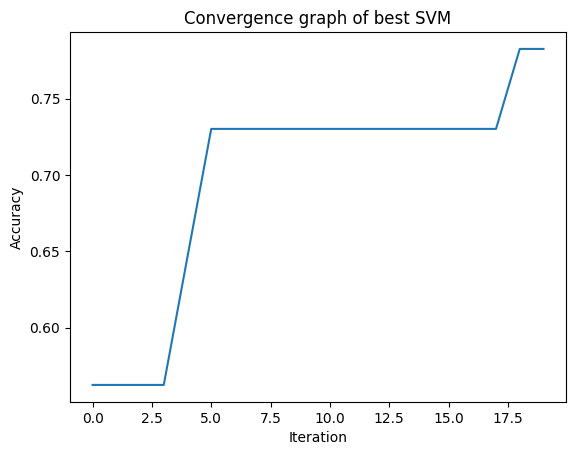

In [19]:
all_samples.to_csv('result.csv',index=False)
all_samples.to_markdown('result.md',index=False)

plt.plot(np.arange(len(cvgs_data)),cvgs_data)
plt.title('Convergence graph of best SVM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()
